In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import ModelCheckpoint
import numpy as np
import pandas as pd
import imageio
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [2]:
num_classes = 2 #output classes 2

In [3]:
# load labels 
from numpy import genfromtxt
y_train = genfromtxt('training.csv', delimiter=',')
y_val =  genfromtxt('test.csv', delimiter=',')
y_test = genfromtxt('validation.csv', delimiter=',')


C:\Users\Zain Kabir\Anaconda3\envs\tensorflow-sessions\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_packbits'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\Zain Kabir\Anaconda3\envs\tensorflow-sessions\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'decode_lzw'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\Zain Kabir\Anaconda3\envs\tensorflow-sessions\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'unpack_ints'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
C:\Users\Zain Kabir\Anaconda3\envs\tensorflow-sessions\lib\site-packages\imageio\plugins\_tifffile.py:7285: UserWarning: module 'imageio.plugins._tifffile' has no attribute 'reverse_bitor

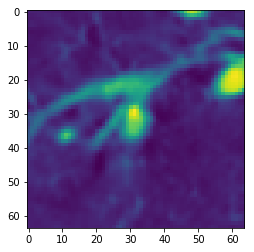

(670, 64, 64, 1)
(670, 64, 64, 1)


In [4]:
im=imageio.mimread('training_data.tif')
x_train = np.array(im) 
plt.imshow(x_train[1], interpolation='nearest')
plt.show()
x_train = x_train.reshape(x_train.shape[0],64,64,1)  


im=imageio.mimread('test_data.tif')
x_test = np.array(im) 
x_test = x_test.reshape(x_test.shape[0],64,64,1)  
print(x_test.shape)


im=imageio.mimread('validation_data.tif')
x_val = np.array(im) 
x_val = x_val.reshape(x_val.shape[0],64,64,1)  
print(x_val.shape)



In [5]:
model=load_model('model_final_pruned_5_trained.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1_input (InputLayer)  (None, 64, 64, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 256)         0         
__________

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.30546588968874805
Test accuracy: 0.9238805959473795


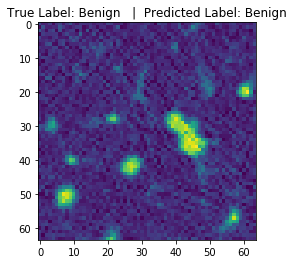

In [ ]:
run=1
while(run):
    image_ind=np.random.choice(670, 1,)
    img=x_test[image_ind,:,:,:]
    label=y_test[image_ind]
    imgr=img.reshape(64,64)
    pr=model.predict(img)
    get_ind= np.argmax(pr)
    
    
    if get_ind==0:
        pred_l='Malignant'
    else:
        pred_l='Benign'

    if label[0,0]==1:
        true_l='Malignant'
    else:
        true_l='Benign'

    title='True Label: '+true_l + '   |  Predicted Label: ' + pred_l;


    fig=plt.figure(1)
    imgplot = plt.imshow(imgr, interpolation='nearest')
    plt.title(title)
    plt.show()
  
    fig.savefig('image2.png')
    run=input('Enter 1 to run again')
